# OCR Using Quantum Neural Network

---



Dataset Link: https://www.kaggle.com/datasets/preatcher/standard-ocr-dataset/data

In [1]:
from google.colab import files

# Uploading the kaggle.json file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
# Moving the uploaded kaggle.json file to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
# Downloading the dataset from kaggle
!kaggle datasets download -d preatcher/standard-ocr-dataset

 97% 45.0M/46.2M [00:03<00:00, 18.3MB/s]
100% 46.2M/46.2M [00:03<00:00, 12.6MB/s]


In [4]:
# Unzipping the downloaded dataset
!unzip -q standard-ocr-dataset.zip

In [5]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import os
import cv2

# Function to load images from a given folder
def load_images_from_folder(folder_path):
    labels = [str(i) for i in range(10)] + [chr(i) for i in range(ord('A'), ord('Z') + 1)]
    images = []

    for label in labels:
        label_path = os.path.join(folder_path, label)
        for filename in os.listdir(label_path):
            img_path = os.path.join(label_path, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            images.append((img, label))

    return images

In [7]:
# Path to the main data folder
data_path = "/content/data"

# Loading training data
training_data_path = os.path.join(data_path, "training_data")
training_images = load_images_from_folder(training_data_path)

# Loading testing data
testing_data_path = os.path.join(data_path, "testing_data")
testing_images = load_images_from_folder(testing_data_path)

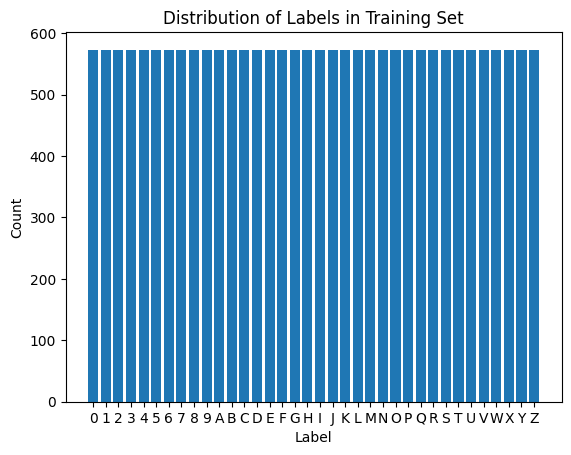

In [8]:
# Defining labels
labels = [str(i) for i in range(10)] + [chr(i) for i in range(ord('A'), ord('Z') + 1)]

# Checking the distribution of labels
label_counts = {label: 0 for label in labels}
for _, label in training_images:
    label_counts[label] += 1

plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Set')
plt.show()

  All the labels have equal number of images.

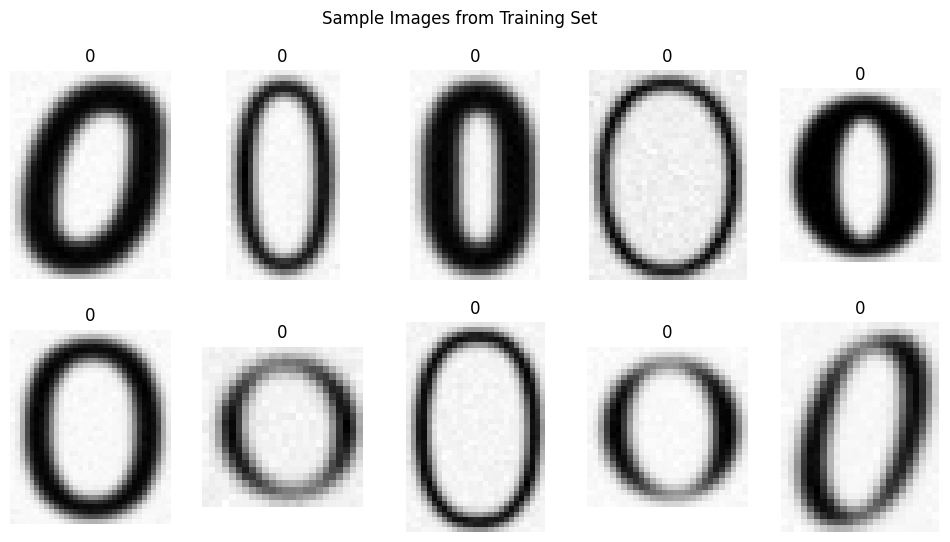

In [9]:
# Visualizing a few sample images
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i in range(2):
    for j in range(5):
        img, label = training_images[i * 5 + j]
        axes[i, j].imshow(img, cmap='gray')
        axes[i, j].set_title(label)
        axes[i, j].axis('off')
plt.suptitle('Sample Images from Training Set')
plt.show()

In [10]:
# Resizing images to a consistent size
target_size = (64, 64)
training_images = [(cv2.resize(img, target_size), label) for img, label in training_images]
testing_images = [(cv2.resize(img, target_size), label) for img, label in testing_images]

# Normalizing pixel values to the range [0, 1]
training_images = [(img / 255.0, label) for img, label in training_images]
testing_images = [(img / 255.0, label) for img, label in testing_images]

In [11]:
# Separating images and labels for training set
X_train, y_train = zip(*training_images)

# Separating images and labels for testing set
X_test, y_test = zip(*testing_images)

# Displaying the size of the training and testing sets
print(f"Training Set Size: {len(X_train)}")
print(f"Testing Set Size: {len(X_test)}")

Training Set Size: 20628
Testing Set Size: 1008


In [12]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Converting labels to numerical format
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Saving label_encoder to a file
joblib.dump(label_encoder, 'label_encoder.joblib')

# Reshaping images for  QNN
X_train = np.array(X_train).reshape(-1, 64, 64, 1)
X_test = np.array(X_test).reshape(-1, 64, 64, 1)

In [ ]:
from tensorflow.keras.utils import to_categorical

# One-Hot Encoding
y_train = to_categorical(y_train, num_classes=36)
y_test = to_categorical(y_test, num_classes=36)

Now we can work on building our Quantum Neural Network model for Optimal Character Recognition.

## Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Defining the Quantum Neural Network (QNN) model
qnn = Sequential(name="Quantum_Neural_Network")

qnn.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1), name='Quantum_Conv1'))
qnn.add(MaxPooling2D(name='Quantum_MaxPool1'))
qnn.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', name='Quantum_Conv2'))
qnn.add(MaxPooling2D(name='Quantum_MaxPool2'))
qnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', name='Quantum_Conv3'))
qnn.add(MaxPooling2D(name='Quantum_MaxPool3'))
qnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', name='Quantum_Conv4'))
qnn.add(Flatten(name='Quantum_Flatten'))
qnn.add(Dense(units=128, activation='relu', name='Quantum_Dense1'))
qnn.add(Dense(units=64, activation='relu', name='Quantum_Dense2'))
qnn.add(Dense(units=36, activation='softmax', name='Quantum_Output'))

# Compiling the Quantum Neural Network (QNN) model
qnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Displaying the model summary
qnn.summary()

Model: "Quantum_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Quantum_Conv1 (Conv2D)      (None, 62, 62, 16)        160       
                                                                 
 Quantum_MaxPool1 (MaxPooli  (None, 31, 31, 16)        0         
 ng2D)                                                           
                                                                 
 Quantum_Conv2 (Conv2D)      (None, 29, 29, 32)        4640      
                                                                 
 Quantum_MaxPool2 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 Quantum_Conv3 (Conv2D)      (None, 12, 12, 64)        18496     
                                                                 
 Quantum_MaxPool3 (MaxPooli  (None, 6, 6, 64

In [ ]:
# Training the model
qnn.fit(X_train, y_train, epochs=10, batch_size=25, validation_split=0.2)

Epoch 1/10
661/661 [==============================] - 18s 8ms/step - loss: 0.6871 - accuracy: 0.8045 - val_loss: 17.4068 - val_accuracy: 0.0264
Epoch 2/10
661/661 [==============================] - 5s 8ms/step - loss: 0.1841 - accuracy: 0.9373 - val_loss: 24.0963 - val_accuracy: 0.0252
Epoch 3/10
661/661 [==============================] - 4s 6ms/step - loss: 0.1285 - accuracy: 0.9533 - val_loss: 21.4343 - val_accuracy: 0.0254
Epoch 4/10
661/661 [==============================] - 5s 8ms/step - loss: 0.1028 - accuracy: 0.9597 - val_loss: 27.3956 - val_accuracy: 0.0247
Epoch 5/10
661/661 [==============================] - 5s 8ms/step - loss: 0.0899 - accuracy: 0.9648 - val_loss: 28.0830 - val_accuracy: 0.0262
Epoch 6/10
661/661 [==============================] - 4s 6ms/step - loss: 0.0764 - accuracy: 0.9700 - val_loss: 25.4524 - val_accuracy: 0.0264
Epoch 7/10
661/661 [==============================] - 5s 7ms/step - loss: 0.0642 - accuracy: 0.9752 - val_loss: 34.6110 - val_accuracy: 0.025

In [ ]:
# Evaluating accuracy on the testing set
test_accuracy = qnn.evaluate(X_test, y_test)[1]
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

32/32 [==============================] - 0s 9ms/step - loss: 5.5574 - accuracy: 0.7788
Test Accuracy: 77.88%


In [ ]:
# Saving the model to a file
qnn.save("quantum_neural_network_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
